<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
    
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 

<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.




<p></p><p></p><p></p>





**Le problème posé :**

# <font color='blus'>Indexation d'images</font>

Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Du coup, vous vous demandez ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc réaliser un index de l’ensemble de la base de données d’images qu’ils possèdent, pour classer les chiens par races.

**<font color='blus'>Les données</font>**

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous développerez un algorithme en utilisant le Stanford Dogs Dataset pour entraîner votre algorithme.

**<font color='blus'>Votre mission</font>**

En tant que Data Scientist, l'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

**<font color='blus'>Contraintes</font>**

Lors de ce projet, vous mettrez en œuvre deux approches.

* Une approche classique : il s’agit de pre-processer des images avec des techniques spécifiques (e.g.whitening, equalisation, filtre linéaire/laplacien/gaussien, éventuellement modifier la taille des images), puis d’extraire des features (e.g. texture, corners, edges et SIFT detector). Il faut ensuite réduire les dimensions, soit par des approches classiques (e.g. PCA, k-means) soit avec une approche par histogrammes et dictionary learning (bag-of-words appliqué aux images), puis appliquer des algorithmes de classification standards.



* Lors de l’analyse exploratoire, vous regarderez si les features extraites et utilisées en classification sont prometteuses en utilisant des méthodes de réduction de dimension pour visualiser le dataset en 2D. Cela vous permettra d’affiner votre intuition sur les différents traitements possibles, sans que cela ne se substitue à des mesures de performances rigoureuses.



* Une approche s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels). Compte tenu de la taille et de la complexité du dataset, et de la puissance de calcul à votre disposition, il est très difficile d’obtenir de bonnes performances (pour ça, essayez MNIST). Aussi, est-il recommandé d’utiliser le transfer learning, c’est-à-dire utiliser un réseau déjà entraîné, et le modifier pour répondre à votre problème. Une première chose obligatoire est de ré-entraîner les dernières couches pour prédire les classes qui vous intéressent seulement. Il est également possible d’adapter la structure (supprimer certaines couches par exemple) ou de ré-entraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

In [114]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

#### New version of  `oP7_DataBreed` instance is updated and dumped

When class `P7_DataBreed` is upaded, this lead to update methods and attributes.
While attributes does not exists in old version of `P7_DataBreed`, this process allows 
to create an instance of latest version of `P7_DataBreed` class, update new attributes values and dump it.

* Fist step : save 
    * Copy of `oP7_DataBreed` holds new methods.
    * New attributes that does not exists into old version of `oP7_DataBreed` are masked into copy process
* Second step : new attributes update
    * Original instance of `oP7_DataBreed` is created; this instance hold new methods and new attributes.
    * Saved instance of new version from `P7_DataBreed` is copied back into original instance.
* Third step : backup of new instance 
    * New instance of `oP7_DataBreed` with new methods and updated attributes is dumped into a file.

In [151]:
import P7_DataBreed
if False :
    oP7_DataBreed = P7_DataBreed.update_object_save(oP7_DataBreed, is_saved=True,is_new_attribute=True)
else :
    oP7_DataBreed = P7_DataBreed.P7_DataBreed('./data/Images')

oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 0
Total number of images ........ : 0
Standard images size .......... : (200, 200)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 0
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (4, 4)
Dataframe images descriptors .. : 0 / Index([], dtype='object')
KP filtering .................. : True
Squarred image

#### When required, reload saved object.

In [152]:
import p5_util
if False :
    filename ='./data/oP7_DataBreed.dump'
    oP7_DataBreed = p5_util.object_load(filename)
    oP7_DataBreed.show()

# <font color='blus'>1. Sampled dataset</font>

## <font color='blus'>1.1. Loading the whole dataset</font>

In [153]:
import P7_DataBreed

if False : 
    oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/Images')
    oP7_DataBreed.load()
    oP7_DataBreed.std_size_build()
    oP7_DataBreed.show()


## <font color='blus'>1.2. Loading a sampled the dataset</font>

In [154]:
list_dirbreed = ['n02107142-Doberman','n02115641-dingo','n02113978-Mexican_hairless']
oP7_DataBreed.std_size = (224,224)
oP7_DataBreed.split_ratio=(3,3)
oP7_DataBreed.load(list_dirbreed=list_dirbreed)
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 0
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 0
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 0 / Index([], dtype='object')
KP filtering .................. : True
Squarred ima

## <font color='blus'>1.3. Building SIFT descriptors</font>

#### Filtered are assigned in regards with analysis from `P7_FilterExploration.ipynb` notebook

In [155]:
import P7_DataBreed
list_processor_id = [3, 2, 11, 6]
oP7_DataBreed.list_processor_id= list_processor_id
oP7_DataBreed.build_sift_desc(is_splitted=True)
oP7_DataBreed.kp_filter()

oP7_DataBreed.show()

*** build_sift_desc() ...
Building...

INFO : Error = 0 Total images processed= 4149
*** Before filtering       : (4149, 6)
*** After 1st filter level : (3444, 6)


/home/bangui/.local/lib/python3.6/site-packages/pandas/core/ops.py:1122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x, y, op)
/home/bangui/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


*** After KP filter        : (2037, 8)

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 4149
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 3
Image splitted ................ : True
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 2037 / Index(['raw', 'col', 'desc', 'bre

### <font color='blus'>Building array of all Key points descriptors</font>

In [156]:
oP7_DataBreed.build_arr_desc()

oP7_DataBreed.show()

Processed rows= 1000/4149
Processed rows= 2000/4149

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 4149
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 3
Image splitted ................ : True
Key point descriptors ......... : (11981, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 2037 / Index(['raw', 

#### Kolmogorov/Smirnof test

H0 : null hypothesis, means, KP distribution is a normal distribution

<br>
If this hypothesis is not available, then impact on the remaining study will be important beacause algorithms 
used for clusterization will be selected based on this hypothesis.

<br>
Then agreeing with H0 lead to first class risk.

<br>
Result computed with Kolmogorov/Smirnov test shows that H0 hypothesys is unlikely.
<br>
Also distributions distances are largely greater then 0.

In [145]:
from scipy import stats
import random
import p3_util

def distribution_desc_test(self, list_distribution=None,random_row_count = 100):
    count =0
    statistic = 0.
    pvalue = 0.
    dict_test = dict()
    if list_distribution is None :
        list_distribution = ['norm']
    else :
        pass
    arr = p3_util.df_get_std_scaled_values(self.df_desc)
    for distribution in list_distribution : 
        for row in range(0, random_row_count,1):
            X = random.choice(arr)
            #X = arr[random_row,:]
            result = stats.kstest(X, 'norm')
            statistic += result.statistic
            pvalue += result.pvalue
        statistic /= random_row_count
        pvalue /= random_row_count
        print("Average tests for for law = '"+distribution+"' over observations :(statistic,pvalue)= ({0:1.2F},{1:1.4F})".format(statistic,pvalue))
        dict_test[distribution] = (statistic, pvalue*100)
    return dict_test

In [174]:
import P7_DataBreed

#list_dirbreed = ['n02107142-Doberman','n02115641-dingo','n02113978-Mexican_hairless']
list_dirbreed = ['n02113978-Mexican_hairless']
oP7_DataBreed_single=P7_DataBreed.P7_DataBreed('./data/Images')

list_processor_id = [3,2,11,6]
oP7_DataBreed_single.list_processor_id= list_processor_id
oP7_DataBreed_single.std_size = (300,300)
oP7_DataBreed_single.split_ratio=(3,3)

oP7_DataBreed_single.load(list_dirbreed=list_dirbreed)
if True :
    oP7_DataBreed_single.build_sift_desc(is_splitted=False)
    oP7_DataBreed_single.kp_filter()
    oP7_DataBreed_single.build_arr_desc()

oP7_DataBreed_single.show()

*** build_sift_desc() ...
Building...

INFO : Error = 0 Total images processed= 155

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 1
Total number of images ........ : 155
Standard images size .......... : (300, 300)
SIFT Image descriptors count .. : 155
Number of images in sample .... : 0
Sampling : breeds count ....... : 1
Sampling : images per breed ... : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 1
Image splitted ................ : False
Key point descriptors ......... : (9798, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descrip

In [176]:

print(oP7_DataBreed_single.df_desc.shape)
dists = ['uniform', 'norm', 'lognorm', 'expon', 'beta',
         'powerlaw', 'bradford', 'burr', 'fisk', 'cauchy', 'halfcauchy',
         'foldcauchy', 'gamma', 'gengamma', 'loggamma',
         'alpha', 'anglit', 'arcsine', 'betaprime', 'dgamma',
         'exponnorm', 'exponweib', 'exponpow', 'frechet_l', 'frechet_r',
         'gilbrat', 'f', 'ncf', 'chi2', 'chi', 'nakagami', 'genpareto',
         'genextreme', 'genhalflogistic', 'pareto', 'lomax', 'halfnorm',
         'halflogistic', 'fatiguelife', 'foldnorm', 'ncx2', 't', 'nct',
         'weibull_min', 'weibull_max', 'dweibull', 'maxwell', 'rayleigh',
         'genlogistic', 'logistic', 'gumbel_l', 'gumbel_r', 'gompertz',
         'hypsecant', 'laplace', 'reciprocal', 'trapz', 'triang', 'tukeylambda',
         'vonmises', 'vonmises_line', 'pearson3', 'gennorm', 'halfgennorm',
         'rice', 'kappa4', 'kappa3', 'truncnorm', 'argus']
dict_test = distribution_desc_test(oP7_DataBreed_single,random_row_count = 1000, list_distribution=dists)

(9798, 128)
Average tests for for law = 'uniform' over observations :(statistic,pvalue)= (0.23,0.0037)
Average tests for for law = 'norm' over observations :(statistic,pvalue)= (0.23,0.0030)
Average tests for for law = 'lognorm' over observations :(statistic,pvalue)= (0.23,0.0031)
Average tests for for law = 'expon' over observations :(statistic,pvalue)= (0.23,0.0029)
Average tests for for law = 'beta' over observations :(statistic,pvalue)= (0.23,0.0027)
Average tests for for law = 'powerlaw' over observations :(statistic,pvalue)= (0.22,0.0034)
Average tests for for law = 'bradford' over observations :(statistic,pvalue)= (0.23,0.0031)
Average tests for for law = 'burr' over observations :(statistic,pvalue)= (0.23,0.0027)
Average tests for for law = 'fisk' over observations :(statistic,pvalue)= (0.22,0.0034)
Average tests for for law = 'cauchy' over observations :(statistic,pvalue)= (0.23,0.0027)
Average tests for for law = 'halfcauchy' over observations :(statistic,pvalue)= (0.23,0.002

## <font color='blus'>1.4 PCA analysis</font>

** Component = 100


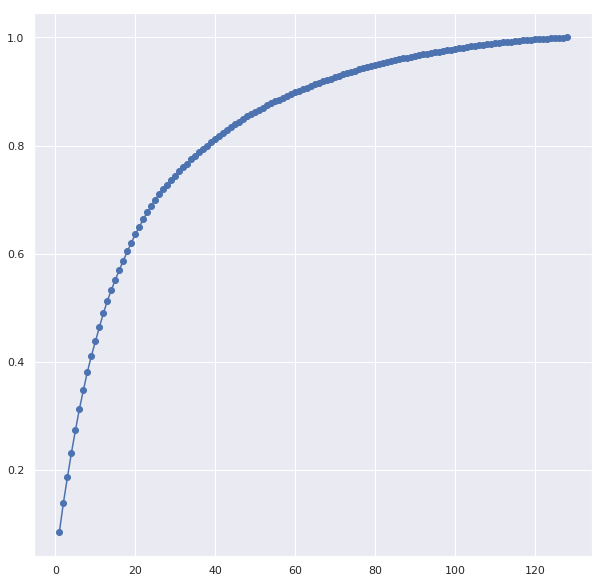

In [177]:
import p3_util_plot
X_scaled = p3_util_plot.pca_all_plot(oP7_DataBreed.df_desc)

array([[-0.63279996, -0.62513106, -0.54123515, ..., -0.5582048 ,
        -0.4830374 , -0.46348407],
       [-0.73526755, -0.62513106, -0.54123515, ..., -0.5227057 ,
        -0.36217549, -0.46348407],
       [-0.66695582, -0.53606769, -0.30992537, ..., -0.5582048 ,
        -0.4830374 , -0.46348407],
       ...,
       [ 0.5284993 ,  0.20612708, -0.47514664, ..., -0.5582048 ,
        -0.4830374 , -0.42282745],
       [-0.73526755, -0.62513106, -0.54123515, ...,  2.56571541,
        -0.4427501 , -0.46348407],
       [ 1.31408409,  0.1467515 , -0.54123515, ..., -0.5582048 ,
        -0.4830374 , -0.46348407]])

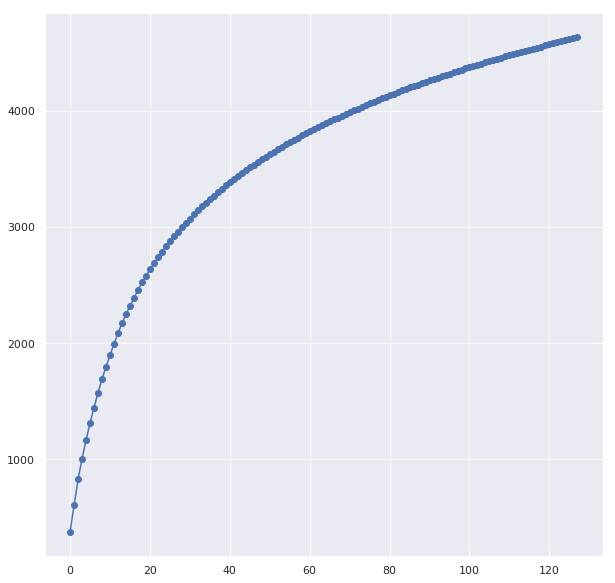

In [179]:
import p3_util_plot
p3_util_plot.df_kpca_all_plot(oP7_DataBreed.df_desc)

In [ ]:
import p3_util

df_desc.shape

nb_components = 60
X_scaled = p3_util.df_get_std_scaled_values(oP7_DataBreed.df_desc)

X_scaled.shape

#-----------------------------------------------------------------------
# Build PCA algorithm
#-----------------------------------------------------------------------
pca = PCA(n_components=nb_components)
pca.fit(X_scaled)

X_projected = pca.transform(X_scaled)
X_projected.shape

On the curve above, it is shown that 60 components explains more than 90% of the variance.
<br>
Reducing dimension from 128 to 60 allows to drasticaly save resources.

#### 68 components are filtered thanks to PCA reduction

In [ ]:
import P7_DataBreed
oP7_DataBreed.kpdesc_pca_reshape(60)
oP7_DataBreed.show()

# <font color='blus'> 2. Clustering</font>

## <font color='blus'> 2.1 Hierarchic clustering</font>

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import p5_util
import P7_DataBreed

if False :
    is_hrc_clustering = True
    if is_hrc_clustering is True :
        clustering='Hierarchical_clustering'

        df_desc = oP7_DataBreed.df_desc
        cluster_start = 1
        cluster_end   = 10

        clustering=oP7_DataBreed.cluster_model_name
        str_is_splitted = str(oP7_DataBreed.is_splitted)
        filename='./data/dict_list_'+clustering+'_'+str(cluster_end)+'_splitted_'+str_is_splitted+'_clusters.dump'


        ward = AgglomerativeClustering(n_clusters=cluster_end, linkage='ward')#.fit(oP7_DataBreed.df_desc)


    #-----------------------------------------------------------------------------------
    # Dictionary of clusters model is updated
    #-----------------------------------------------------------------------------------
    oP7_DataBreed.dict_cluster_model = {'Hierarchical_clustering':ward}



    #-----------------------------------------------------------------------------------
    # Data values (descriptors) are assigned to clusters
    #-----------------------------------------------------------------------------------
    pred_hclust = ward.fit_predict(df_desc.values)
    print(df_desc.shape)

    df_desc = p5_util.df_add_cluster(df_desc, pred_hclust)
    print(df_desc.shape)

    #-----------------------------------------------------------------------------------
    # Histogram for assignement is displayed
    #-----------------------------------------------------------------------------------
    p5_util_plot.plot_cluster_frequency(df_desc)

## <font color='blus'>2.2. GMM clustering</font>
<br>
Due to the fact that an observable and measurable character in a population of comparable individuals often has a frequency modeled by a normal dsitribution.

<br>
Also, SIFT features extracted from images do not depend neither of picture geometry nor zoom effects.

<br>
Then a strong asumption lead by intuition is figured out. Similar features extracted from images reflect similar characters from a breed.

<br>
This hypothesis lead to use GMM over the whole dataset in order to compound similar features  that will lead to characterize a breed.



In [284]:
import p5_util
import P7_DataBreed

df_desc = oP7_DataBreed.df_desc
cluster_start = 1
cluster_end = 10

filename='./data/dict_list_gmm_model_'+str(cluster_end)+'_splited_clusters.dump'

dict_hyper_parameter={'covariance_type':['diag','spherical','full','tied']}
#dict_hyper_parameter={'covariance_type':['tied'], 'tol':[1e-4]}
t_range_cluster = (cluster_start, cluster_end)
dict_list_gmm_model = p5_util.gmm_hyper_parameter_cv(df_desc, t_range_cluster ,dict_hyper_parameter)

p5_util.object_dump(dict_list_gmm_model,filename)

Clustering from clusters range from : 1 --> 10
GMM Hyper-parameter type= covariance_type
Hyper parameter value : diag


/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Hyper parameter value : spherical
Hyper parameter value : full


/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:273: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Hyper parameter value : tied


In [344]:
import p5_util
filename='./data/dict_list_gmm_model_'+str(cluster_end)+'_splited_clusters.dump'
dict_list_gmm_model = p5_util.object_load(filename)
dict_list_gmm_model.keys()

p5_util.object_load : fileName= ./data/dict_list_gmm_model_10_splited_clusters.dump


dict_keys(['diag', 'spherical', 'full', 'tied'])

#### Plot AIC and BIC criteria

In [349]:
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 4149
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (1833, 50)
y train size .................. : (1833, 3)
X test size ................... : (204, 50)
y test size ................... : (204, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (2037, 50)
Encoded labels from dataset ... : (2037, 3)
Number of breeds in sample .... : 3
Image splitted ................ : True
Key point descriptors ......... : (11981, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 2037 / Index(['raw', '

In [ ]:
import p5_util
import p5_util_plot

dict_list_gmm_model = p5_util.object_load(filename)

p_figsize = (14,7)
t_range_cluster = (cluster_start, cluster_end+1)
breed_count = oP7_DataBreed._sampling_breed_count
img_per_breed=oP7_DataBreed._sampling_image_per_breed_count
str_desc = str(oP7_DataBreed._Xdesc.shape[0])
p_title = "GMM clustering "+str_desc+" desc. / "+str(cluster_end)+" breeds"
p5_util_plot.gmm_models_plot_AIC_BIC(df_desc, dict_list_gmm_model, t_range_cluster, p_figsize, p_title)

In [292]:
df_desc = oP7_DataBreed.df_desc
df_desc.shape

(11981, 128)

#### Compute and plot silhouette coefficient

In [293]:
import p5_util
df_desc = oP7_DataBreed.df_desc
dict_dict_silhouette_score = p5_util.gmm_silhouette_compute(df_desc, dict_list_gmm_model)

filename = './data/dict_dict_silhouette_score_'+str(cluster_end)+'_splitted_breeds.dump'
p5_util.object_dump(dict_dict_silhouette_score,filename)


GMM Silhouette score: Hyper-parameter=diag
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10

GMM Silhouette score: Hyper-parameter=spherical
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10

GMM Silhouette score: Hyper-parameter=full
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM 

In [327]:
import numpy as np
list_row_col = list()
for i in range(0,2):
    for j in range(0,2) :
        list_row_col.append((i,j))
list_row_col

for hyper_parameter,row_col in zip(dict_dict_silhouette_score,list_row_col):
    print(row_col[0],row_col[1],hyper_parameter)
    break

arr = np.zeros(1)    
if isinstance(arr,np.ndarray):
    print(type(arr))

0 0 diag
<class 'numpy.ndarray'>


p5_util.object_load : fileName= ./data/dict_dict_silhouette_score_10_splitted_breeds.dump


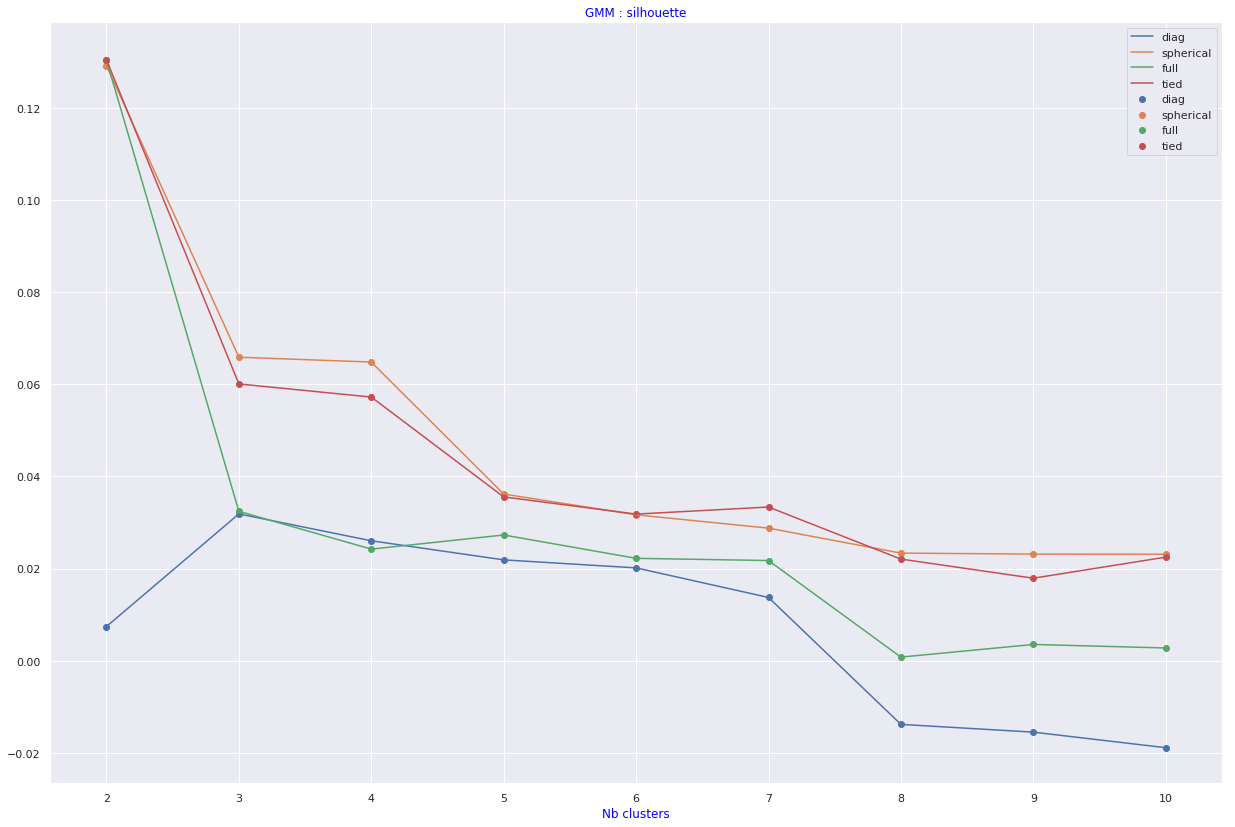

In [330]:
import p5_util_plot
filename = './data/dict_dict_silhouette_score_'+str(cluster_end)+'_splitted_breeds.dump'
dict_dict_silhouette_score = p5_util.object_load(filename)


p_figsize=(21,14)
areas_rows = 1
areas_colums =1
p_title = "GMM : silhouette"
p5_util_plot.gmm_models_plot_silhouette(df_desc, dict_dict_silhouette_score\
, p_figsize, p_title, areas_rows, areas_colums)

In [345]:
import p5_util
filename='./data/dict_list_gmm_model_'+str(cluster_end)+'_splited_clusters.dump'
dict_list_gmm_model = p5_util.object_load(filename)

p5_util.object_load : fileName= ./data/dict_list_gmm_model_10_splited_clusters.dump


In [346]:
p_covariance_type = 'full'
cluster_end=20
n_cluster = 3
df_desc = oP7_DataBreed.df_desc
df_desc.shape
dict_list_gmm_model.keys()

dict_keys(['diag', 'spherical', 'full', 'tied'])

(11981, 128)
(11981, 129)
Clusters = [0 1 2]
Population cumulée par cluster = 11981
         Count
cluster       
0         6689
2         2722
1         2570


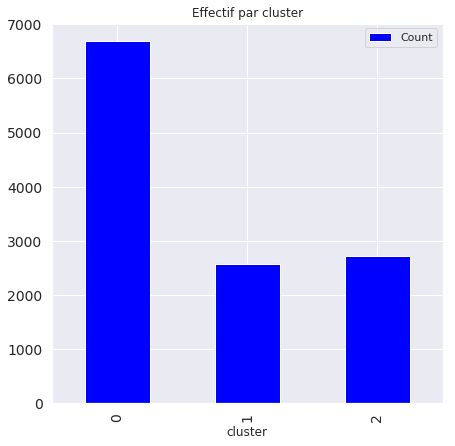

In [347]:
import p5_util
import p5_util_plot

#-----------------------------------------------------------------------------------
# Best GMM model is updated
#-----------------------------------------------------------------------------------
list_gmm_model = dict_list_gmm_model[p_covariance_type]
for gmm_model in list_gmm_model:
    if n_cluster == gmm_model.n_components:
        break
gmm_model

#-----------------------------------------------------------------------------------
# Dictionary of clusters model is updated
#-----------------------------------------------------------------------------------
oP7_DataBreed.dict_cluster_model = {'GMM':gmm_model}

if 'cluster' in df_desc.columns:
    del(df_desc['cluster'])
    
#-----------------------------------------------------------------------------------
# Data values (descriptors) are assigned to clusters
#-----------------------------------------------------------------------------------
pred_gmm = gmm_model.predict(df_desc.values)
print(df_desc.shape)

df_desc = p5_util.df_add_cluster(df_desc, pred_gmm)
print(df_desc.shape)

#-----------------------------------------------------------------------------------
# Histogram for assignement is displayed
#-----------------------------------------------------------------------------------
p5_util_plot.plot_cluster_frequency(df_desc)

In [366]:
gmm_model

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

## <font color='blus'>2.3. Kmeans clustering</font>

This algorithm requires a lot of CPU ressources in order to produce a result with feeded data.
<br>
Applied this data-model on Intel CPU 8 cores and 16GB RAM requires more then 10 hours for 8 clusters.
<br>
It has not been used for this project.

In [215]:
is_kmeans_clustering = False

In [216]:
import p5_util
import P7_DataBreed
#oP7_DataBreed.cluster_model_name = 
if is_kmeans_clustering is True :
    clustering='Kmeans'

    df_desc = oP7_DataBreed.df_desc

    cluster_start = 1
    cluster_end = 20

    #clustering=oP7_DataBreed.cluster_model_name
    str_is_splitted = str(oP7_DataBreed.is_splitted)
    filename='./data/dict_list_'+clustering+'_'+str(cluster_end)+'_splitted_'+str_is_splitted+'_clusters.dump'

    dict_kmeans = p5_util.kmeans_scan_inter_inertia(df_desc, cluster_start, cluster_end)

    oP7_DataBreed.dict_cluster_model = {clustering:dict_kmeans[oP7_DataBreed.sampling_breed_count]}
    oP7_DataBreed.show()

In [217]:
if is_kmeans_clustering is True :

    oP7_DataBreed.cluster_model_name='Kmeans'
    oP7_DataBreed.show()

    cluster_model = oP7_DataBreed.cluster_model
    n_cluster == cluster_model.n_clusters
    n_cluster


    if 'cluster' in df_desc.columns:
        del(df_desc['cluster'])

    #-----------------------------------------------------------------------------------
    # Data values (descriptors) are assigned to clusters
    #-----------------------------------------------------------------------------------
    pred_cluster = cluster_model.predict(df_desc.values)
    print(df_desc.shape)

    df_desc = p5_util.df_add_cluster(df_desc, pred_cluster)
    print(df_desc.shape)

    #-----------------------------------------------------------------------------------
    # Histogram for assignement is displayed
    #-----------------------------------------------------------------------------------
    p5_util_plot.plot_cluster_frequency(df_desc)

## <font color='blus'>2.4. ISOMAP embedding</font>

In [167]:
is_isomap=True

In [168]:
from sklearn.manifold import Isomap
if is_isomap is True :
    embedding = Isomap(n_components=2)
    X_2D = embedding.fit_transform(oP7_DataBreed.df_desc)

1


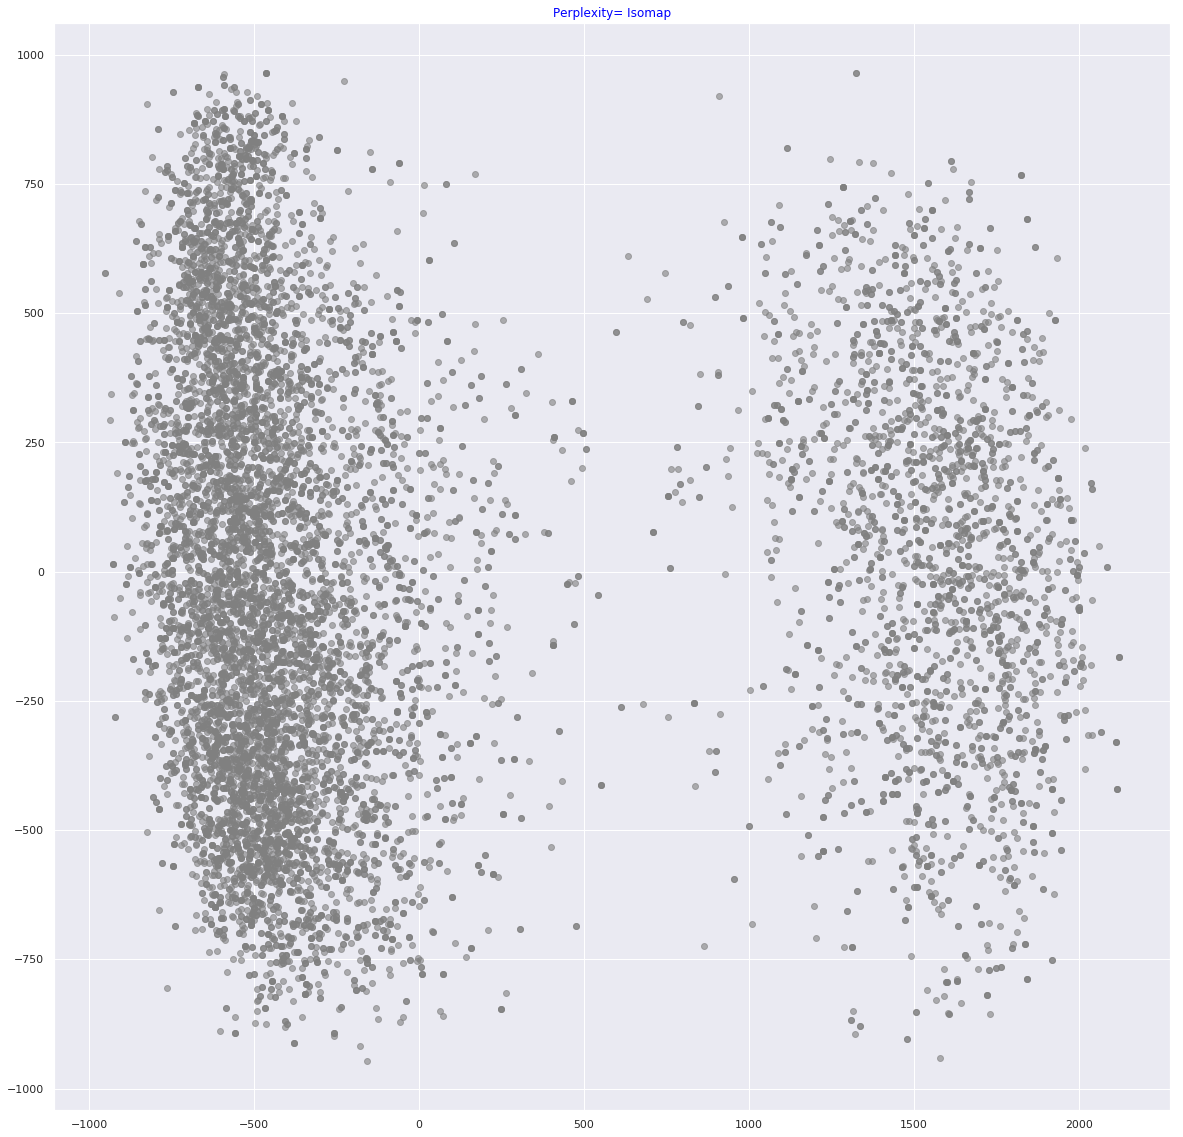

In [169]:
import p5_util_plot
dict_isomap_result_part={'Isomap':X_2D}
print(len(dict_isomap_result_part))

p5_util_plot.plot_2D_dict_tsne_result(dict_isomap_result_part, 1)

## <font color='blus'>2.4. t-SNE reduction</font>

<br>

Applying t-SNE allows to validate SIFT descriptors as features used for the digitalized dataset representation.

<br>

This algorithm uses a Gaussian distribution to evaluate distance similarity.

<br>

This should be relevant considering that SIFT features extracted from dogs images from same breed are normaly distruted.


### <font color='blus'>2.4.1. t-SNE reduction over a part of dataset</font>

In [244]:
import p5_util_plot

row_count = oP7_DataBreed.df_desc.shape[0]
row_count = int(row_count/10)
df = oP7_DataBreed.df_desc.sample(row_count)
df.shape
dict_tsne_result_part \
= p5_util.tsne_X_dim_process_perplexity(df, list_tsne_perplexity=[10,20,30,40], tsne_iter=3000, dim=3)

tSNE perplexity : 10/50 ...
tSNE perplexity : 20/50 ...
tSNE perplexity : 30/50 ...
tSNE perplexity : 40/50 ...


<IPython.core.display.Javascript object>


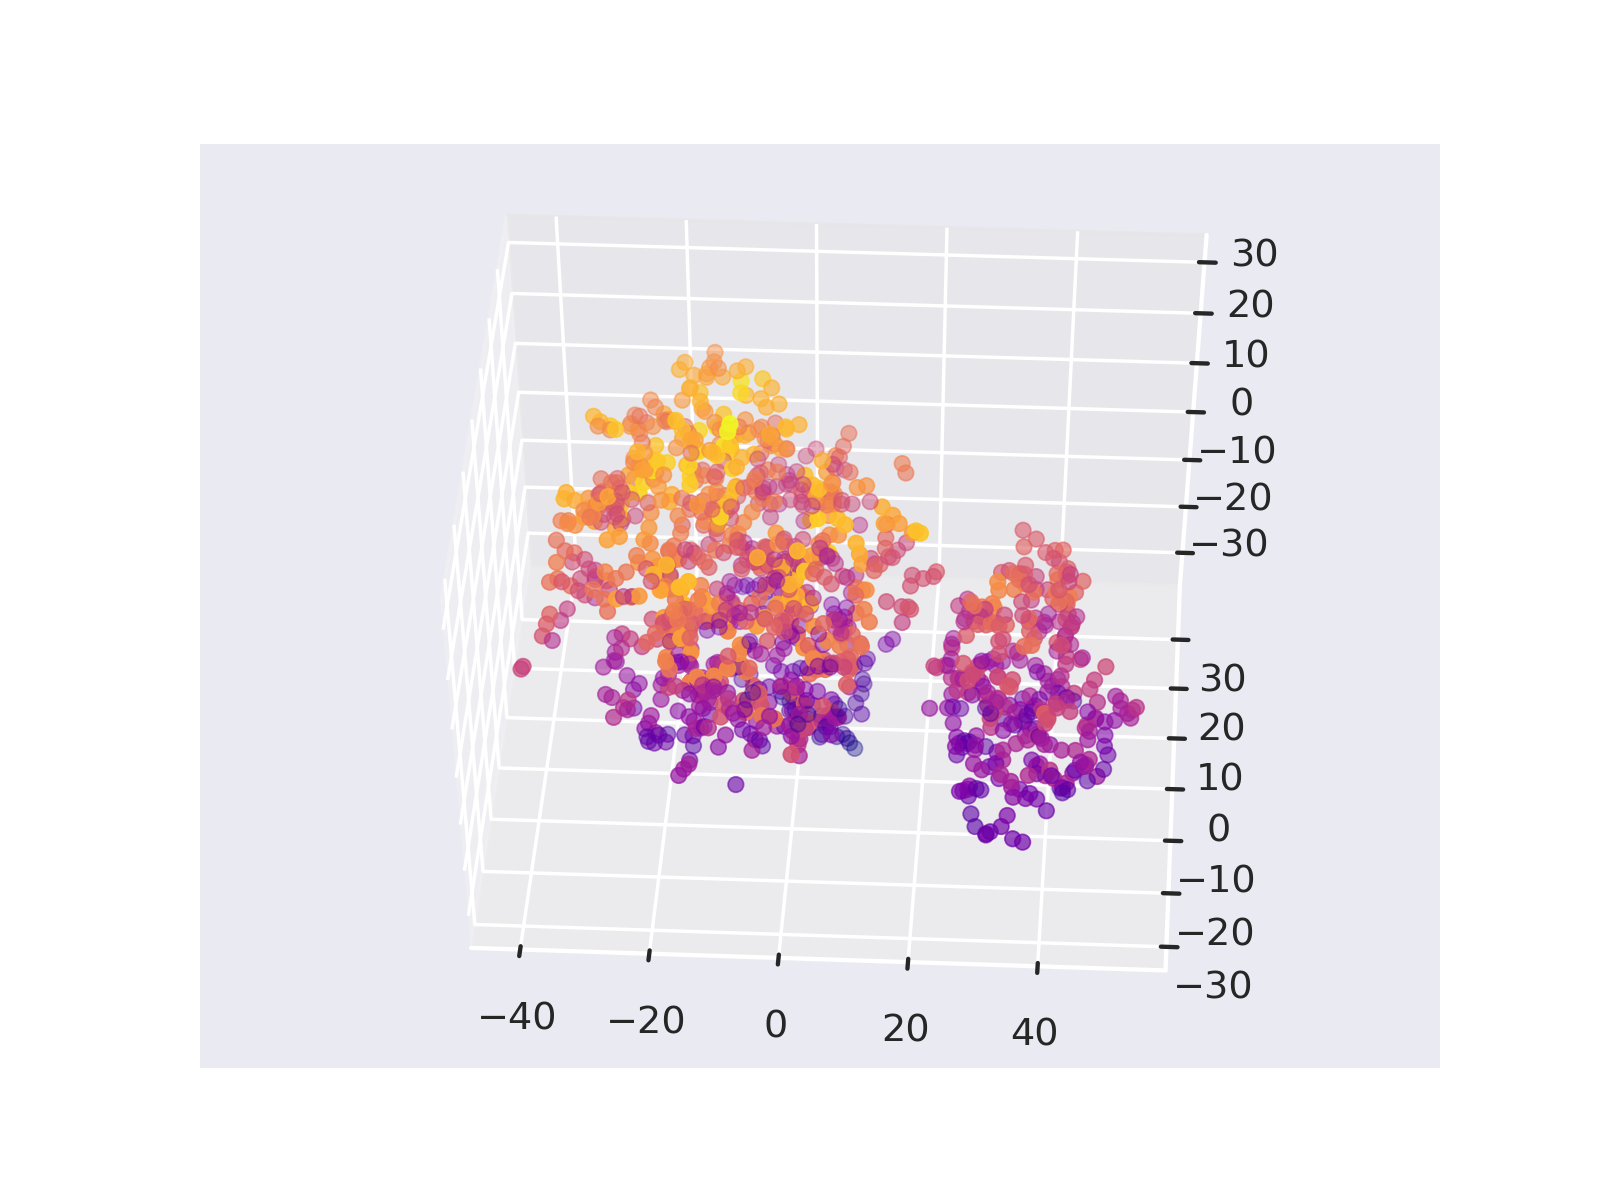

In [278]:
%matplotlib notebook
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
X = dict_tsne_result_part[10]
x= X[:, 0]
y= X[:, 1]
z= X[:, 2]

ax.scatter(x, y, z, c=z, cmap='plasma', linewidth=0.5);

Perplexity= 10


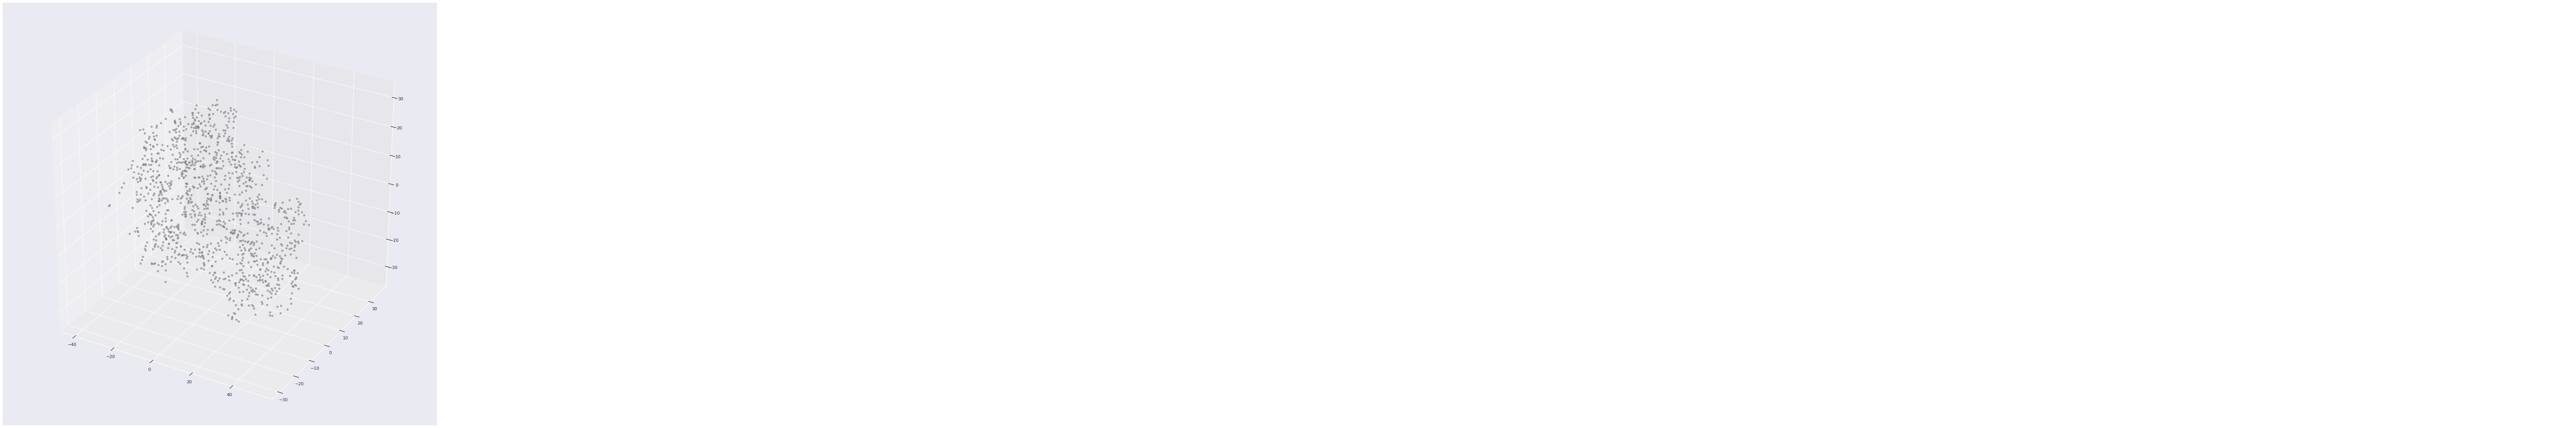

In [273]:
import p3_util_plot

perplexity = 10
title = "t-SNE perplexity= "+str(perplexity)
dict_tsne_result_part_0 = {perplexity:dict_tsne_result_part[perplexity]}
p5_util_plot.plot_3D_dict_tsne_result(dict_tsne_result_part_0, 2)

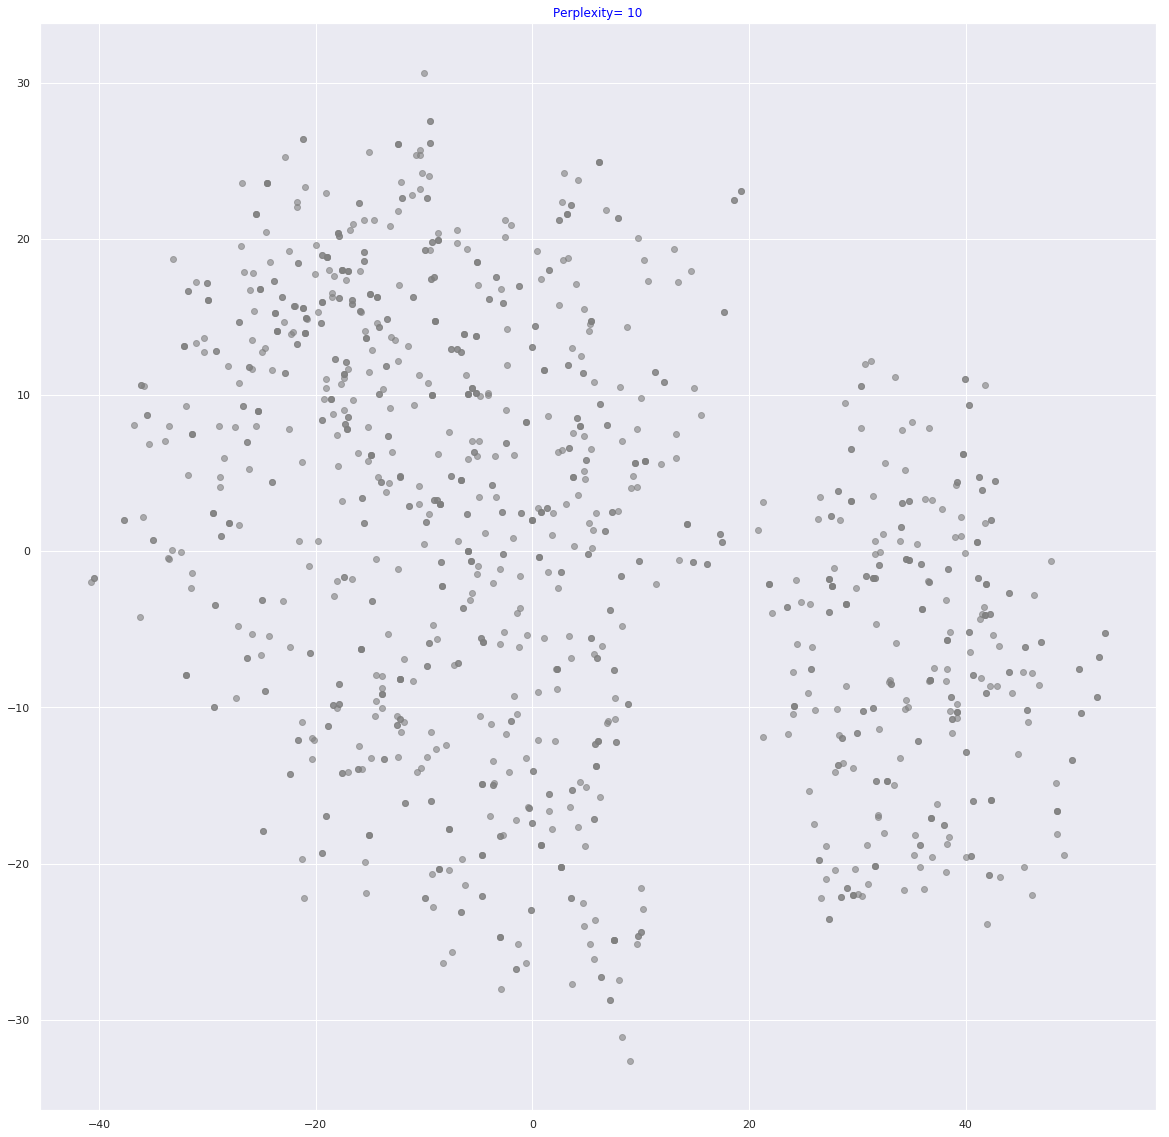

In [283]:
%matplotlib inline
import p5_util_plot
p5_util_plot.plot_2D_dict_tsne_result({10:dict_tsne_result_part[10]}, 1, dim=(0,2))

In [101]:
dict_tsne_result_part[40].shape

(1754, 2)

### <font color='blus'>2.4.1. t-SNE reduction over all dataset</font>

In [3]:
import p5_util
dict_tsne_result = p5_util.tsne_X_dim_process_perplexity(oP7_DataBreed.df_desc, list_tsne_perplexity=[30,], tsne_iter=1500)

p5_util.object_dump(dict_tsne_result, './data/dict_tsne_result.dump')

tSNE perplexity : 30/50 ...


In [7]:
dict_tsne_result.keys()
len(dict_tsne_result[30])

175413

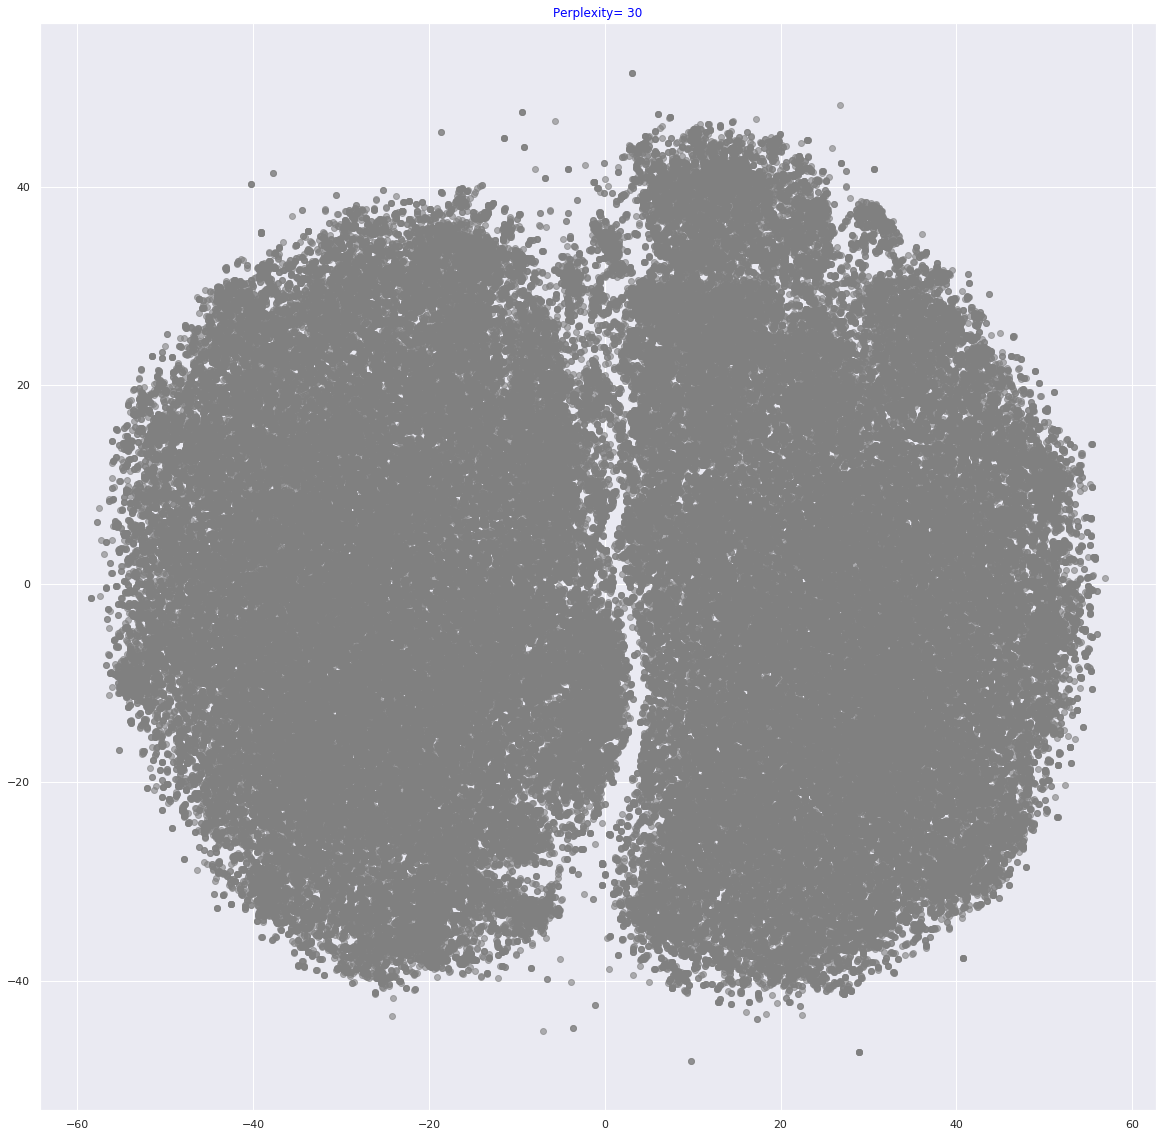

In [9]:
import p5_util_plot
p5_util_plot.plot_2D_dict_tsne_result(dict_tsne_result, 1)

# <font color='blus'>3. Building BOF</font>

#### `GMM` model is used

In [350]:
oP7_DataBreed.cluster_model_name='GMM'
#oP7_DataBreed.cluster_model_name='Hierarchical_clustering'
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 4149
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (1833, 50)
y train size .................. : (1833, 3)
X test size ................... : (204, 50)
y test size ................... : (204, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (2037, 50)
Encoded labels from dataset ... : (2037, 3)
Number of breeds in sample .... : 3
Image splitted ................ : True
Key point descriptors ......... : (11981, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 2037 / Index(['raw', '

#### Building a bag of features

In [351]:
oP7_DataBreed.build_ser_number_breedname()
oP7_DataBreed._ser_breed_number

import p5_util
import P7_DataBreed

oP7_DataBreed.build_datakp_bof()
oP7_DataBreed._ser_breed_number.keys()
oP7_DataBreed.show()


INFO : Series already built!
Building...

***Nb of errors..............= 0

***Nb of labelized images ...= 2037
Number of referenced labels= 3
Number of labels to be encoded= 2037

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 4149
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (1833, 50)
y train size .................. : (1833, 3)
X test size ................... : (204, 50)
y test size ................... : (204, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (2037, 3)
Encoded labels from dataset ... : (2037, 3)
Number of breeds in sample .... : 3
Image splitted ................ : True
Key point descriptors ......... : (11981, 128)
Classifier name .........

#### We check all BOF vectors are normalized

In [196]:
oP7_DataBreed.df_bof.apply(lambda x: x.dot(x.T), axis=0)

0    1.0
1    1.0
2    1.0
dtype: float64

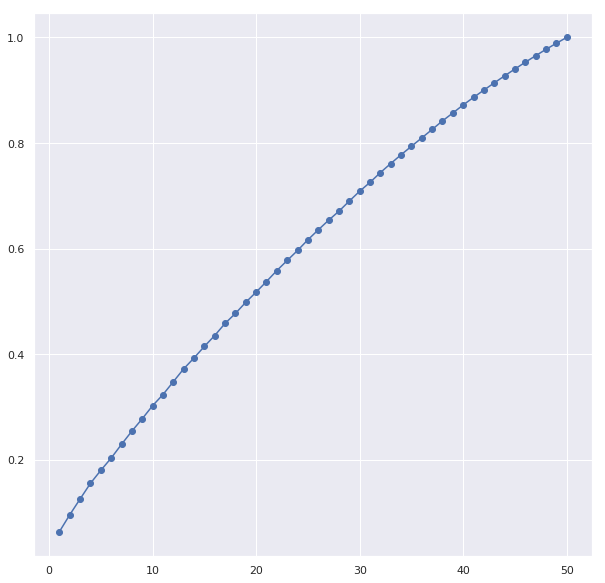

In [229]:
import p3_util_plot
X_scaled = p3_util_plot.pca_all_plot(oP7_DataBreed.df_bof)

# <font color='blus'>4. Supervized model </font>

## <font color='blus'>4.1. Building model </font>

## <font color='blus'>2.2. Model evaluation </font>

Dataset dis splitted into train and test dataset.

In [352]:
import P7_DataBreed

oP7_DataBreed.train_test_build(size_test=0.1)
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 3
Total number of images ........ : 461
Standard images size .......... : (224, 224)
SIFT Image descriptors count .. : 4149
Number of images in sample .... : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 0
X train size .................. : (1833, 3)
y train size .................. : (1833, 3)
X test size ................... : (204, 3)
y test size ................... : (204, 3)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (2037, 3)
Encoded labels from dataset ... : (2037, 3)
Number of breeds in sample .... : 3
Image splitted ................ : True
Key point descriptors ......... : (11981, 128)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 2037 / Index(['raw', 'col

#### We make sure y_test and y_train vectors hold all classes.

In [198]:
import numpy as np
np.unique(oP7_DataBreed.y_test),np.unique(oP7_DataBreed.y_train)

(array([0, 1]), array([0, 1]))

### <font color='blus'>3.2.1. Data model benchmark with supervized algorithm </font>

In [353]:
is_dumped = False

In [354]:
if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    dict_cls_score = p5_util.object_load(filename)

    filename = './data/best_dict_classifier.dump'
    dict_classifier = p5_util.object_load(filename)
else :
    dict_cls_score = dict()
    dict_classifier = dict()
    is_dumped = True

#### <font color='blus'>Evaluation with hyper-parameter `multi_class='multinomial'`</font>

In [355]:
from sklearn.linear_model import LogisticRegression
import p5_util
import p6_util
import P7_DataBreed

dict_param_grid = {
    #'estimator__C': [ 1.e-3, 5e-3, 1e-2, 5.e-2, 1.e-1, 0.5, 1., 1.5], # Best classifier: 1.e-1, accuracy=0.41
    #'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 0.1, accuracy=0.41
    'estimator__C': [1e-6, 1e-5, 1.e-4, 1.e-3, 1.e-2, ], # Best classifier: 0.1, accuracy=0.41
    'estimator__solver':['newton-cg', 'lbfgs' ,'sag'],
    'estimator__penalty': ['l2',],
    'n_jobs': [-1]
}
cls_name = 'L.R. + multinomial'

dict_cls_score = dict()
X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
classifier = LogisticRegression(multi_class='multinomial',solver='newton-cg')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

classifier  = gscv_classifier.best_estimator_
best_score_ = gscv_classifier.best_score_

dict_classifier[cls_name]=classifier
dict_cls_score[cls_name] = best_score_


if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)


dict_cls_score

(1833, 3) (1833, 3) (204, 3) (204, 3)
0.0
{'estimator__C': 1e-06, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg', 'n_jobs': -1}


{'L.R. + multinomial': 0.0}

#### <font color='blus'>Evaluation of Logictic regression with hyper-parameter `multi_class='ovr'`</font>

In [356]:
from sklearn.linear_model import LogisticRegression
import p5_util
import p6_util
import P7_DataBreed

dict_param_grid = {
    #'estimator__C': [ 1.e-1, 0.5, 1., 1.5], # Best classifier: 1.5, accuracy=0.27
    #'estimator__C': [ 1.5, 2.0, 2.5], # Best classifier: 2.5, accuracy>0.27
    #'estimator__C': [2.5, 5.0, 10., ], # Best classifier: 10.0 , accuracy=0.28
    #'estimator__C': [10., 50., 100., ], # Best classifier: 100.0 , accuracy=0.29
    'estimator__C': [140,150,200,300,500,1000], # Best classifier: 90.0 , accuracy=0.287
    'estimator__solver':['newton-cg', 'lbfgs' ,'sag','liblinear'],
    #'estimator__solver':[ 'saga','liblinear'],
    'estimator__penalty': ['l2'],
    'n_jobs': [-1]
}
cls_name = 'L.R. + ovr'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
classifier = LogisticRegression(multi_class='ovr')

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=False)

classifier  = gscv_classifier.best_estimator_
best_score_ = gscv_classifier.best_score_

dict_classifier[cls_name]=classifier
dict_cls_score[cls_name] = best_score_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

(1833, 3) (1833, 3) (204, 3) (204, 3)
0.02727768685215494
{'estimator__C': 500, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg', 'n_jobs': -1}


{'L.R. + multinomial': 0.0, 'L.R. + ovr': 0.02727768685215494}

#### <font color='blus'>Evaluation of Bernoulli NB </font>

In [357]:
dict_cls_score

{'L.R. + multinomial': 0.0, 'L.R. + ovr': 0.02727768685215494}

In [358]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import p6_util

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

if False :
    scaler = StandardScaler()
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test) 

classifier = BernoulliNB()
cls_name = 'Bernoulli NB'

dict_param_grid = {
    'estimator__alpha': [ 1.e-4, 5.e-4, 1.e-3, 5.e-3, 1.e-2, 5.e-2, 1.e-1], # Best result : alfa=1E-4
    #'estimator__alpha': [ 1.e-4, ], #
    'n_jobs': [-1]
}
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score


0.0
{'estimator__alpha': 0.0001, 'n_jobs': -1}


{'L.R. + multinomial': 0.0,
 'L.R. + ovr': 0.02727768685215494,
 'Bernoulli NB': 0.0}

#### <font color='blus'>Evaluation of Multinomial NB</font>

In [359]:
from sklearn.naive_bayes import MultinomialNB

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

cls_name = 'Multinomial NB'
classifier = MultinomialNB()
dict_param_grid = {
    #'estimator__alpha': [ 1.e-3, 5.e-2, 1.e-1, 5.e-1, 1.], #1.e-3 : Accuracy 0.0
    'estimator__alpha': [ 1.e-5, 1.e-4, 1.e-3,], #1.e-3 : Accuracy 0.0
    'n_jobs': [-1]
}

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)
dict_cls_score

0.0
{'estimator__alpha': 1e-05, 'n_jobs': -1}


{'L.R. + multinomial': 0.0,
 'L.R. + ovr': 0.02727768685215494,
 'Bernoulli NB': 0.0,
 'Multinomial NB': 0.0}

#### <font color='blus'>Evaluation of Gaussian NB</font>

In [360]:
from sklearn.naive_bayes import GaussianNB
from scipy import sparse


X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

cls_name = 'Gaussian NB'
classifier = GaussianNB()

dict_param_grid = dict()
y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)
dict_cls_score

0.07637752318603383
{}


{'L.R. + multinomial': 0.0,
 'L.R. + ovr': 0.02727768685215494,
 'Bernoulli NB': 0.0,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.07637752318603383}

#### <font color='blus'>Linear SVC</font>

In [361]:
from sklearn.svm import LinearSVC

nb_estimators=100
cls_name = 'Linear SVC'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

dict_param_grid = {
        #'estimator__C': [ 1e-1,5e-1,1.,0.5,10], # 10 / 0.282%
        #'estimator__C': [ 10,20,30], # 30 / 0.283%
        'estimator__C': [ 30, 50,100,200], # 100 / 0.283%
        'n_jobs': [-1]
}
classifier = LinearSVC(multi_class='ovr')

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

0.027823240589198037
{'estimator__C': 100, 'n_jobs': -1}


{'L.R. + multinomial': 0.0,
 'L.R. + ovr': 0.02727768685215494,
 'Bernoulli NB': 0.0,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.07637752318603383,
 'Linear SVC': 0.027823240589198037}

#### <font color='blus'>Random Forest</font>

In [362]:
from sklearn.ensemble import RandomForestClassifier
cls_name = 'Random Forest'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
dict_param_grid = {
    #'estimator__n_estimators': [ 100, 200, 300,], # 100, accuracy=0.295
    #'estimator__n_estimators': [ 10,50,90,100,110], # 10, accuracy=0.297
    'estimator__n_estimators': [ 5,9,10,11,15], # 10, accuracy=0.297
}
classifier = RandomForestClassifier()

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

0.18057828696126568
{'estimator__n_estimators': 15}


{'L.R. + multinomial': 0.0,
 'L.R. + ovr': 0.02727768685215494,
 'Bernoulli NB': 0.0,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.07637752318603383,
 'Linear SVC': 0.027823240589198037,
 'Random Forest': 0.18057828696126568}

#### <font color='blus'>Kernel Ridge Classfier</font>

In [363]:
from sklearn.linear_model import RidgeClassifier

cls_name = 'Kernel Ridge'

X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test
dict_param_grid = {
    'estimator__alpha': [ 0.1,1.,10.],# 0.1 / 0.281%
    'n_jobs': [-1]
}
cls_name='KR Classifier'
classifier = RidgeClassifier()

y_pred, gscv_classifier = p6_util.p6_gscv_best_classifier(dict_param_grid, classifier, X_train, y_train\
                              , X_test,y_test,cv=3, iid=True)

dict_cls_score[cls_name] = gscv_classifier.best_score_
dict_classifier[cls_name]=gscv_classifier.best_estimator_

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    p5_util.object_dump(dict_cls_score,filename)

    filename = './data/best_dict_classifier.dump'
    p5_util.object_dump(dict_classifier,filename)

dict_cls_score

0.01309328968903437
{'estimator__alpha': 0.1, 'n_jobs': -1}


{'L.R. + multinomial': 0.0,
 'L.R. + ovr': 0.02727768685215494,
 'Bernoulli NB': 0.0,
 'Multinomial NB': 0.0,
 'Gaussian NB': 0.07637752318603383,
 'Linear SVC': 0.027823240589198037,
 'Random Forest': 0.18057828696126568,
 'KR Classifier': 0.01309328968903437}

#### <font color='blus'>Benchmark results</font>

p5_util.object_load : fileName= ./data/dict_cls_score.dump


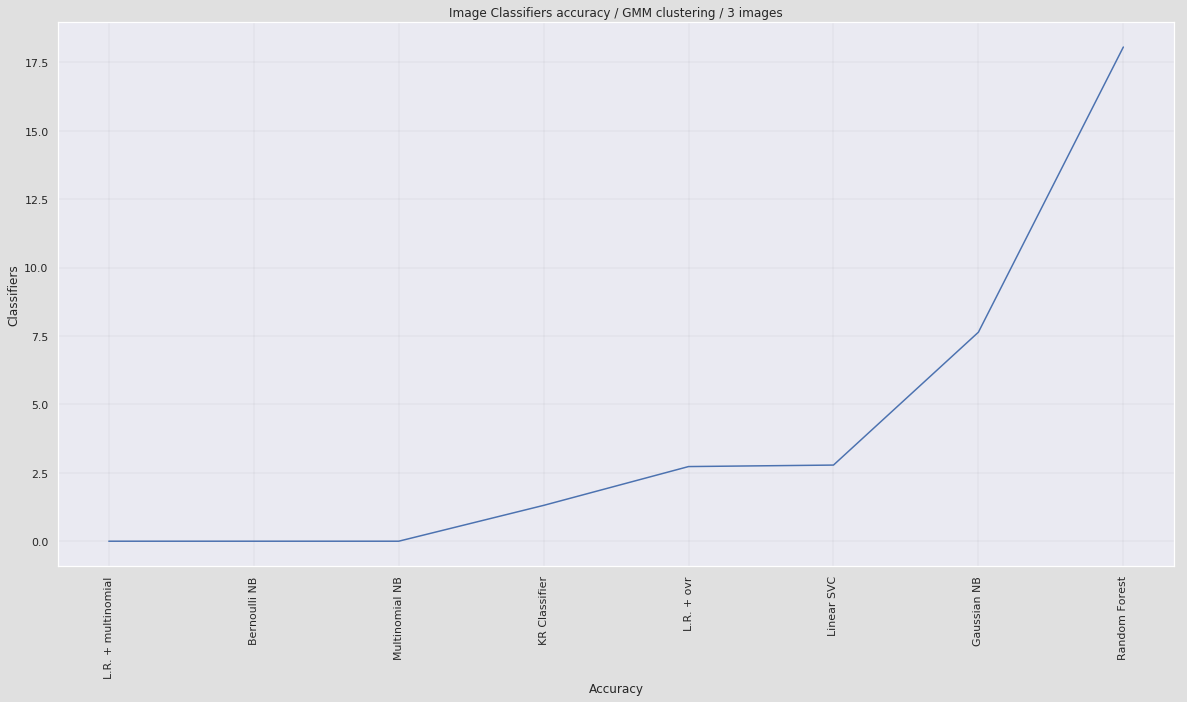

In [364]:
import pandas as pd
import p5_util
import p6_util_plot

if is_dumped is True:
    filename = './data/dict_cls_score.dump'
    dict_cls_score = p5_util.object_load(filename)
else :
    pass

dict_benchmark_result = dict_cls_score.copy()

df_result = pd.DataFrame.from_dict( dict_benchmark_result, orient='index')
df_result.reset_index(inplace=True)
df_result.rename(columns={'index':'Classifier',0:'Score'}, inplace=True)
df_result
nb_images = oP7_DataBreed._sampling_breed_count#*oP7_DataBreed._sampling_image_per_breed_count

title = "Image Classifiers accuracy / GMM clustering / "+str(nb_images)+" images"
p6_util_plot.ser_item_occurency_plot(df_result.Classifier, df_result.Score*100, item_count=None, title=title,\
                                    p_reverse=False)

#### Classifier API



## <font color='blus'>1.4. Building descriptors on a single splitted image</font>

In [365]:
list_name_id_unique
name_id_unique = 'n02113799_3278'
df = df_pil_image_kpdesc[df_pil_image_kpdesc.image_id==name_id_unique]
for (raw, col), list_kp in df.kp.items():
    print(raw,col)
    

NameError: name 'list_name_id_unique' is not defined

In [ ]:
df_result.shape

In [ ]:
df_kp_filtered

In [ ]:
0 in df.index

In [ ]:
df.reset_index(inplace=True)
df

#### An object that aims to hold a single image is built

In [ ]:
import P7_DataBreed
oP7_DataBreed_single = P7_DataBreed.P7_DataBreed()

#### Image structures are copied into `oP7_DataBreed_single` object

In [ ]:
oP7_DataBreed_single._dict_breed_sample=oP7_DataBreed._dict_breed_sample.copy()
oP7_DataBreed_single.show()

#### Images and breeds is shown 

This aims to select an image among list provided by a breed.

List of breeds is displayed in a human readable manner along with directories.

In [ ]:
oP7_DataBreed.show_breed_name()


#### A breed name is picked from list

In [ ]:
oP7_DataBreed._dict_breed_sample.keys()

#### Sample is restricted to a assigned list of image with a single element

This allows to apply building descriptors methods for a single image.

In [ ]:
breedname  = 'Doberman'
image_name = 'n02107142_16917.jpg'
#list_restricted_image = [(breedname,image_name),('Saint_Bernard','n02109525_3360.jpg')]
list_restricted_image = [(breedname,[image_name])]

oP7_DataBreed_single.list_restricted_image = list_restricted_image
oP7_DataBreed_single.show()

#### Image from object is splitted and KP are computed for each image part

In [ ]:
oP7_DataBreed_single.build_sift_desc(is_splitted=True)

oP7_DataBreed_single.show()

In [ ]:
oP7_DataBreed_single._df_pil_image_kpdesc.loc[(1,0)].split_image

#### Splitted image below aims to be displayed with KP

In [ ]:
import p7_util
#p7_util.p7_image_pil_show(dict_split_pil_image,std_image_size=(500,375), is_title=False)
p7_util.p7_image_pil_show(oP7_DataBreed_single.dict_split_pil_image,std_image_size=None, is_title=False)

##### Building dictionaries for drawing invariant Key points for each splitted image

`dict_breed_kpdesc_image` is structured as following : `{breedname:list_of_arrays}`

where :

 * `list_of_arrays` is the list of array issued from `cv2.drawKeypoints()`
 
 The number of arrays is fixed by count of $raw\times col$ where :
 * $raw$ is the number of raws issued from splitted image
 * $col$ is the number of columns issued from splitted image
 
$cv2$ function is used to match key points along with images.

In [ ]:
self = oP7_DataBreed_single


import cv2

raw_new = 0
list_kpdesc = list()
list_image_pil = list()

raw=0
col=0
breedname = self.df_pil_image_kpdesc.loc[(raw,col)][1]
for (raw,col) in self.df_pil_image_kpdesc.index :
    desc = self.df_pil_image_kpdesc.loc[(raw,col)][0]
    kp = self.df_pil_image_kpdesc.loc[(raw,col)][2]
    pil_image = self.df_pil_image_kpdesc.loc[(raw,col)][4]
    list_kpdesc.append((kp, desc))
    list_image_pil.append(pil_image)
    
dict_pil_image_   = {breedname:list_image_pil}
dict_breed_kpdesc = {breedname:list_kpdesc}        


dict_breed_kpdesc_image = dict()
dict_breed_kp_image = dict()
count=0
for (breed, list_breed_kpdesc), list_image_pil in zip(dict_breed_kpdesc.items(), dict_pil_image_.values()):
    count +=1
    dict_breed_kpdesc_image[breed] = [cv2.drawKeypoints(np.array(image_pil), kp, np.array(image_pil)) \
                             for ((kp, desc),image_pil) in zip(list_breed_kpdesc,list_image_pil)]

##### Key points are drawned along with splitted images

Dictionary hold a single key, the breed name.

Flatten array in dictionary, containing KP to be displayed is splitted as $raw$ raws and $col$ columns. 

Result is stored into `arr_`variable.

Processing during SIFT descriptors building has lead to truncate each image as a square. Then the number of raws is equal to the number of columns.



In [ ]:
self = oP7_DataBreed_single
raw = self._split_ratio[0]
col = self._split_ratio[1]

breedname = list(dict_breed_kpdesc_image.keys())[0]

arr_= np.array(dict_breed_kpdesc_image[breedname])


`dict_breed_kpdesc_image_raw` will feed `p7_util.p7_image_pil_show` function.

It is structured as following : `{raw:list_col_image}` where :
* `list_col_image` is the column of images for `raw`.

In [ ]:
import p7_util

dict_breed_kpdesc_image_raw = dict()
col_start = 0
for i_raw in range(0,raw) :
    col_end = col_start+col
    dict_breed_kpdesc_image_raw.update({i_raw:arr_[col_start:col_end,::,::,::]})
    col_start =col_end


p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                          ,size_x=10,std_image_size=None,is_title=False)

#### Heuristic for KP filtering

Image above shows that some areas with a great density of KP that are not focused 
on targeted object (dog). These KP may be regarded as noise considering expected information to be retrieved from KP focused on targeted object.


Idea is to filter these areas based on KP density (number of KP per splitted images).

Threashold min and max values are defined from KP distribution per splitted image.


##### For each splitted image, KP occurencies is computed

`list_breed_kpdesc` contains KP for each split image.

It is a flatten array. KP occurency is computed and stored into the dataframe `df_kp`.



In [ ]:
dict_kp_occurency = dict()
for i_raw in range(0,len(list_breed_kpdesc)) :
    tuple_kp_image = list_breed_kpdesc[i_raw]
    dict_kp_occurency[i_raw] = len(tuple_kp_image[0])

ser = pd.Series(dict_kp_occurency)
df_kp = pd.DataFrame([ser]).T.rename(columns={0:'count'})


##### Threasholds are computed in order to filter splitted images.

Dataframe `df_kp` is used to compute threashold and to build filter from this threashold used to keep images.

In [ ]:
import p3_util
import p3_util_plot


p3_util_plot.df_boxplot_display(df_kp, 'count')

q1,q3,zmin,zmax = p3_util.df_boxplot_limits(df_kp , 'count')
print("Q1   = "+str(q1))
print("Q3   = "+str(q3))
print("Zmin = "+str(zmin))
print("Zmax = "+str(zmax))


In [ ]:
df_kp.describe()

In [ ]:
df_kp_filtered = df_kp[df_kp['count']<int(q3)]
df_kp_filtered = df_kp_filtered[df_kp_filtered['count']>int(q1)]

#### Splitted images with are filtered against `list_index_filtered`

In [ ]:
#dict_breed_kpdesc_image_raw = dict_breed_kpdesc_image_raw_save.copy()
list_filtered_index = list(df_kp_filtered.index)
index=0
for i_row in range(0,row):
    col = dict_breed_kpdesc_image_raw[i_row].shape[0]
    #arr_ = np.zeros((4,50,50,3))
    for i_col in range(0,col):
        if index in list_filtered_index :
            pass
        else :
            # Image index out of filter is erased 
            dict_breed_kpdesc_image_raw[i_row][i_col] =np.zeros((50,50,3))
        index += 1
            

In [ ]:
import p7_util
if True :
    p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                              ,size_x=10,std_image_size=None,is_title=False)

### Applying KP filtering process on another image

#### An object that aims to hold a single image is built

In [ ]:
import cv2

import p3_util
import p3_util_plot


import P7_DataBreed
import p7_util

oP7_DataBreed_single = P7_DataBreed.P7_DataBreed()

oP7_DataBreed_single._dict_breed_sample=oP7_DataBreed._dict_breed_sample.copy()


breedname  = 'Doberman'
image_name = 'n02107142_7300.jpg'
image_name = 'n02107142_7237.jpg'
image_name = 'n02107142_278.jpg'
image_name = 'n02107142_15936.jpg'
image_name = 'n02107142_12191.jpg'
image_name = 'n02107142_16917.jpg'

list_restricted_image = [(breedname,[image_name])]

oP7_DataBreed_single.list_restricted_image = list_restricted_image

oP7_DataBreed_single.build_sift_desc(is_splitted=True)

In [ ]:
p7_util.p7_image_pil_show(oP7_DataBreed_single.dict_split_pil_image,std_image_size=(500,375), is_title=False)

In [ ]:
len(dict_pil_image)

In [ ]:
dict_kp_count = dict()
list_image_pil = list()
dict_pil_image_ = dict()
list_kpdesc = list()

dict_pil_image = oP7_DataBreed_single.dict_split_pil_image
print(len(dict_pil_image))

for list_pil_image in dict_pil_image.values():
    for pil_image in list_pil_image :
        list_image_pil.append(pil_image)
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image)
        list_kpdesc.append((kp, desc))
    
dict_pil_image_={breedname:list_image_pil}
dict_breed_kpdesc={breedname:list_kpdesc}


dict_breed_kpdesc_image = dict()
dict_breed_kp_image = dict()
count=0
for (breed, list_breed_kpdesc), list_image_pil in zip(dict_breed_kpdesc.items(), dict_pil_image_.values()):
    count +=1
    dict_breed_kpdesc_image[breed] = [cv2.drawKeypoints(np.array(image_pil), kp, np.array(image_pil)) \
                             for ((kp, desc),image_pil) in zip(list_breed_kpdesc,list_image_pil)]

arr_= np.array(dict_breed_kpdesc_image[breedname])
raw = int(np.sqrt(arr_.shape[0]))
col = raw

#arr_= np.array(dict_breed_kpdesc_image[breedname])
dict_breed_kpdesc_image_raw = dict()
col_start = 0
for i_raw in range(0,raw) :
    col_end = col_start+col
    dict_breed_kpdesc_image_raw.update({i_raw:arr_[col_start:col_end,::,::,::]})
    col_start =col_end

In [ ]:
p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                          ,size_x=10,std_image_size=None,is_title=False)

In [ ]:
dict_kp_occurency = dict()
for i_raw in range(0,len(list_breed_kpdesc)) :
    tuple_kp_image = list_breed_kpdesc[i_raw]
    dict_kp_occurency[i_raw] = len(tuple_kp_image[0])

ser = pd.Series(dict_kp_occurency)
df_kp = pd.DataFrame([ser]).T.rename(columns={0:'count'})
#df_kp

In [ ]:
p3_util_plot.df_boxplot_display(df_kp, 'count')

q1,q3,zmin,zmax = p3_util.df_boxplot_limits(df_kp , 'count')
print("Q1   = "+str(q1))
print("Q3   = "+str(q3))
print("Zmin = "+str(zmin))
print("Zmax = "+str(zmax))

In [ ]:
kp_min=zmin
kp_max=q3

df_kp_filtered = df_kp[df_kp['count']<int(kp_max)]
df_kp_filtered = df_kp_filtered[df_kp_filtered['count']>int(kp_min)]
if False :
    dict_breed_kpdesc_image_raw_save = dict_breed_kpdesc_image_raw.copy()
    dict_breed_kpdesc_image_raw = dict_breed_kpdesc_image_raw_save.copy()
list_filtered_index = list(df_kp_filtered.index)

index=0
for i_raw in range(0,raw):
    col = dict_breed_kpdesc_image_raw[i_raw].shape[0]
    #arr_ = np.zeros((4,50,50,3))
    for i_col in range(0,col):
        if index in list_filtered_index :
            pass
        else :
            # Image index out of filter is erased 
            dict_breed_kpdesc_image_raw[i_raw][i_col] =np.zeros((50,50,3))
        index += 1

In [ ]:
            
p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                          ,size_x=10,std_image_size=None,is_title=False)

### <font color='blus'>Applying KP filtering process on a breed</font>

In [ ]:
breed_name  = 'Doberman'
image_name = 'n02107142_16917.jpg'

oP7_DataBreed_explorer = image_explore(oP7_DataBreed,breed_name, image_name, False)

* `list_kpdesc` contains tuple of (KP,descriptors) for all splitted image. Flatten image is represented as a flatten array.

* `dict_breed_kpdesc_image_raw` 

In [ ]:
list_kpdesc, dict_breed_kpdesc_image_raw = plot_kpdesc_image(oP7_DataBreed_explorer)

In [ ]:
plot_filtered_kpdesc_image(list_kpdesc, dict_breed_kpdesc_image_raw)

### <font color='blus'>Applying KP filtering process on all images</font>

In [ ]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/EasyImages')
oP7_DataBreed.load()
oP7_DataBreed.std_size_build()
oP7_DataBreed.show()

## <font color='blus'>Sampling the dataset</font>

In [ ]:
breed_count=10
image_per_breed_count=10
oP7_DataBreed.std_size=None

oP7_DataBreed.sampling(breed_count, image_per_breed_count)
oP7_DataBreed.show()

### Images from object is splitted and KP are computed for each splitted image

In [ ]:
oP7_DataBreed.build_sift_desc(is_splitted=True)
oP7_DataBreed.show()

##### Rows are filtered considering KP density over splitted image

In [ ]:
oP7_DataBreed.kp_filter()

oP7_DataBreed.build_arr_desc()

oP7_DataBreed.show()

# <font color='blus'>2. Analysis with images filtered by hand</font>

## <font color='blus'>2.1. Loading the whole dataset</font>

In [ ]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/EasyImages')
oP7_DataBreed.load()
oP7_DataBreed.std_size_build()

oP7_DataBreed.show()

## <font color='blus'>2.2. Sampling the dataset</font>

In [ ]:
import P7_DataBreed

breed_count=10
image_per_breed_count=20
oP7_DataBreed.std_size=(200,200)

oP7_DataBreed.sampling(breed_count, image_per_breed_count)

oP7_DataBreed.build_sift_desc(is_splitted=True)
oP7_DataBreed.show()

## <font color='blus'>2.3. Building array of all Key points descriptors</font>

In [ ]:
oP7_DataBreed.build_arr_desc()

oP7_DataBreed.show()

In [ ]:
filename = './data/oP7_DataBreed.dump'
p5_util.object_dump(oP7_DataBreed,filename)

## <font color='blus'>2.5. DBSCAN clustering</font>

In [ ]:
oP7_DataBreed.X_train.shape,oP7_DataBreed.X_test.shape

In [ ]:
import p3_util_plot
X_train = oP7_DataBreed.X_train
X_test = oP7_DataBreed.X_test
labels_trained, labels_predicted \
= p3_util_plot.clustering_dbscan_plot_and_metrics(X_train, X_test,parameter_eps=3,parameter_min_samples=10) 

## <font color='blus'>2.6. t-SNE</font>

In [ ]:
import p5_util

df_desc = oP7_DataBreed.df_desc
dict_tsne_result = p5_util.tsne_2D_process_perplexity(df_desc)

## <font color='blus'>4. Estimator model evaluation</font>

In [ ]:
import p5_util
filename = './data/oP7_DataBreed_compress.dump'
p5_util.object_compress_dump(oP7_DataBreed,filename)

In [ ]:
import P7_DataBreed

oP7_DataBreed_new = P7_DataBreed.P7_DataBreed('./data/EasyImages')
filename = './data/best_dict_classifier.dump'
oP7_DataBreed_new.dict_classifier_load(filename)

oP7_DataBreed_new.dict_cluster_model = oP7_DataBreed.dict_cluster_model
oP7_DataBreed_new._cluster_model_name='GMM'
oP7_DataBreed_new.classifier_name = 'Bernoulli NB'
oP7_DataBreed_new._ser_breed_number = oP7_DataBreed._ser_breed_number.copy()
oP7_DataBreed_new.show()

#### <font color='blus'> Show breeds names and images from breed that are not into images sample</font>

In [ ]:
oP7_DataBreed.show_breedname()

In [ ]:
oP7_DataBreed.show_image_name('standard_poodle', is_sample_show=False)

In [ ]:
import p7_util
import P7_DataBreed

dirbreed  = 'n02113799-standard_poodle'
imagename = 'n02113799_895.jpg'

print(oP7_DataBreed_new.predict(dirbreed,imagename))

dict_pil_image = P7_DataBreed.process_breed_sample(oP7_DataBreed.dir_path+'/'+dirbreed, [imagename] , oP7_DataBreed.std_size)

dict_pil_image_display = dict()
dict_pil_image_display['Equalized'] = dict_pil_image['equalize'][0]
p7_util.p7_image_pil_show(dict_pil_image_display,std_image_size=None)

In [ ]:
dirbreed  = 'n02107142-Doberman'

imagename = 'n02107142_385.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename)

In [ ]:
oP7_DataBreed_new._ser_breed_number

In [ ]:
dirbreed = 'n02105162-malinois'
imagename ='n02105162_3346.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename)

In [ ]:
imagename = 'n02109525_13154.jpg'
dirbreed = 'n02109525-Saint_Bernard'
oP7_DataBreed_new.predict(dirbreed,imagename,top=7)

In [ ]:
dirbreed = 'n02116738-African_hunting_dog'
imagename = 'n02116738_634.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename,top=7)

In [ ]:
oP7_DataBreed_new._ser_breed_number

In [ ]:
dirbreed = 'n02108089-boxer'

dict_list_image = p7_util.p7_load_data(oP7_DataBreed.dir_path, dirbreed)


In [ ]:
oP7_DataBreed._dict_breed_sample[dirbreed]

In [ ]:
dict_list_image[dirbreed]

In [ ]:
imagename = 'n02108089_12739.jpg'
oP7_DataBreed_new.predict(dirbreed,imagename)

In [ ]:
oP7_DataBreed_new.show()

In [ ]:
print(oP7_DataBreed._dict_breedname_id)

In [ ]:
oP7_DataBreed._dict_breed_sample